In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from src.eda import show_missing_values, summary_statistics, plot_correlation_matrix



In [6]:
df = pd.read_csv('processed_stock_data.csv')

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('Date', inplace=True)

df.head()


,Open,High,Low,Close,Volume,Year,Month,Day,Weekday,Quarter,DayOfYear
Date,,,,,,,,,,,
2020-01-01,186.958937,186.958937,185.783588,186.567154,4208837,2020,1,1,2,1,1
2020-01-02,186.645509,188.800316,186.567159,187.938400,8402979,2020,1,2,3,1,2
2020-01-03,188.839501,188.839501,186.488802,186.880585,9284478,2020,1,3,4,1,3
2020-01-06,186.097031,186.723887,184.138115,184.216476,7636617,2020,1,6,0,1,6
2020-01-07,184.960863,186.410454,183.824694,184.412369,8416741,2020,1,7,1,1,7


In [7]:
print(df.info())
print(df.describe())
print("Missing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 992 entries, 2020-01-01 to 2023-12-29
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       992 non-null    float64
 1   High       992 non-null    float64
 2   Low        992 non-null    float64
 3   Close      992 non-null    float64
 4   Volume     992 non-null    int64  
 5   Year       992 non-null    int64  
 6   Month      992 non-null    int64  
 7   Day        992 non-null    int64  
 8   Weekday    992 non-null    int64  
 9   Quarter    992 non-null    int64  
 10  DayOfYear  992 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 93.0 KB
None
             Open        High         Low       Close        Volume  \
count  992.000000  992.000000  992.000000  992.000000  9.920000e+02   
mean   247.018715  249.385947  244.383199  246.846210  2.120015e+07   
std     97.130534   97.580951   96.619164   97.192713  1.664741e+07   
min    115.96782

## Price Trends Over Time

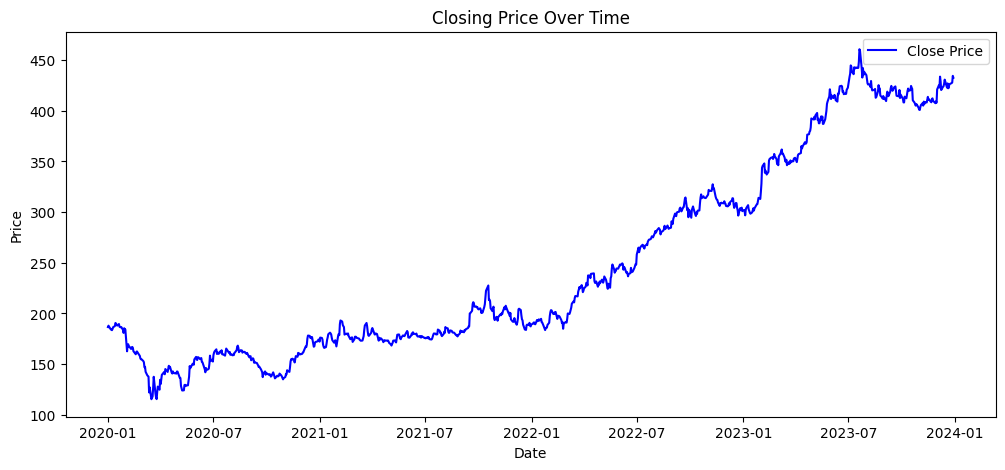

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


## Volume Analysis

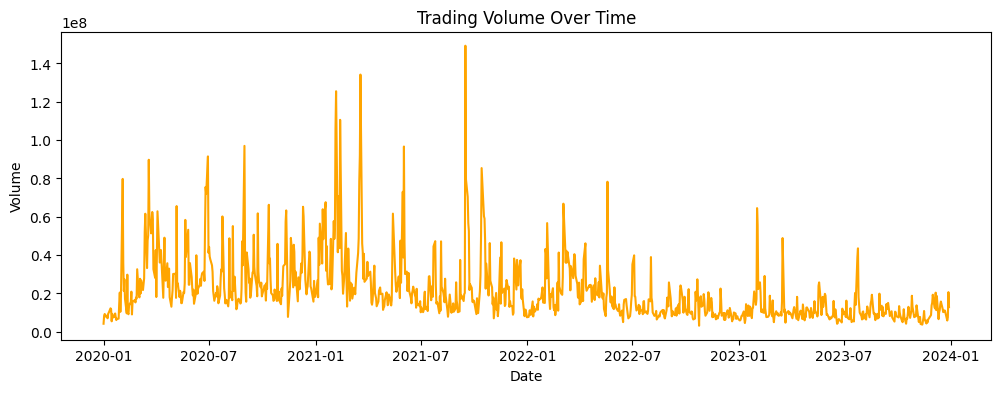

In [9]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Volume'], color='orange')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


## Daily Volatility Approximation

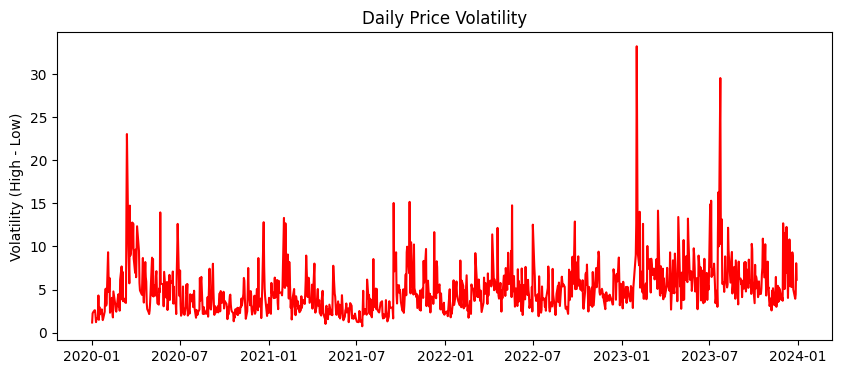

In [10]:
df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(10,4))
plt.plot(df.index, df['Volatility'], color='red')
plt.title("Daily Price Volatility")
plt.ylabel("Volatility (High - Low)")
plt.show()


## Rolling Statistics


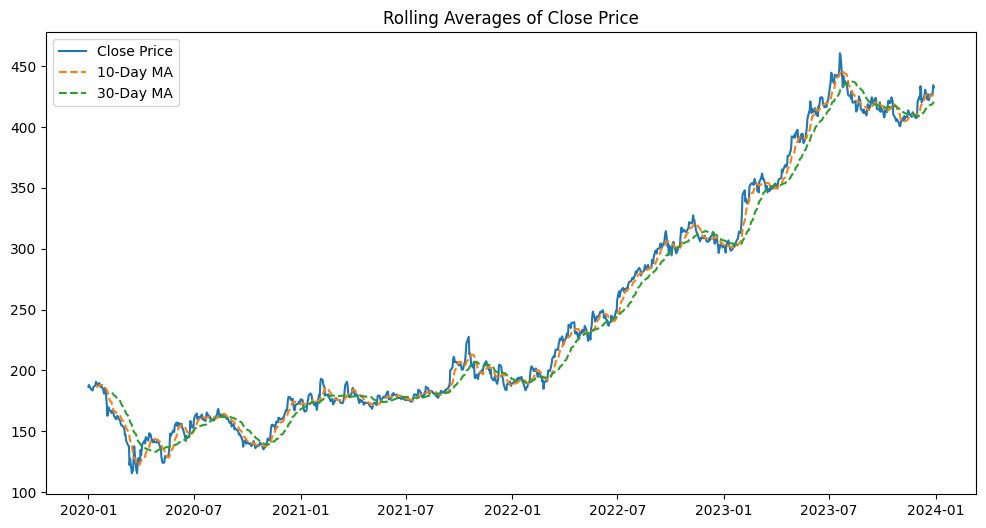

In [11]:
df['Close_MA_10'] = df['Close'].rolling(window=10).mean()
df['Close_MA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Close_MA_10'], label='10-Day MA', linestyle='--')
plt.plot(df['Close_MA_30'], label='30-Day MA', linestyle='--')
plt.title("Rolling Averages of Close Price")
plt.legend()
plt.show()


## Calendar Analysis – Weekday & Month Effects

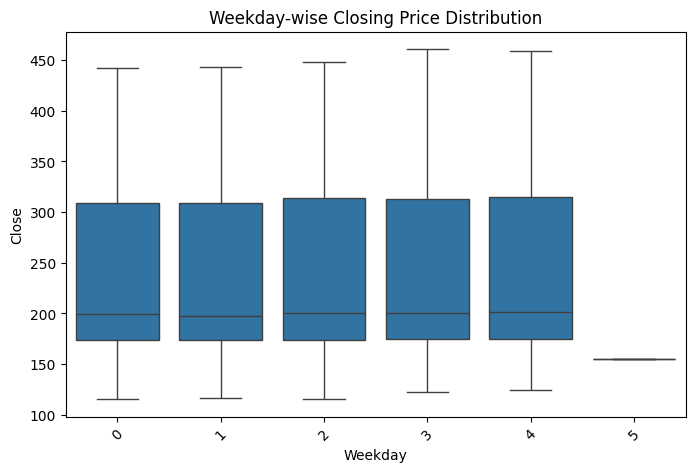

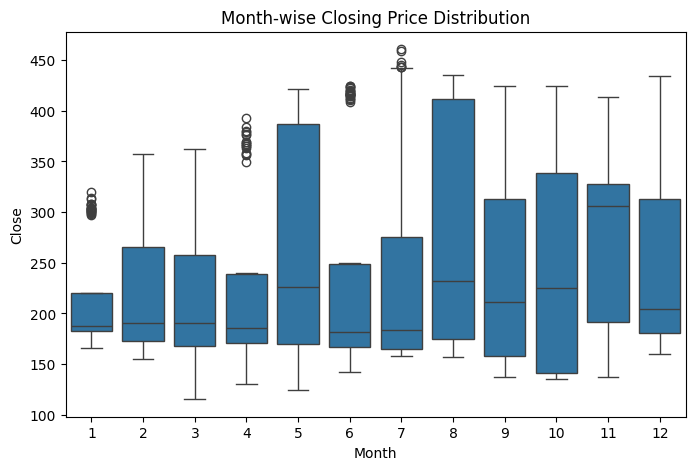

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Weekday', y='Close', data=df.reset_index())
plt.title("Weekday-wise Closing Price Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Month', y='Close', data=df.reset_index())
plt.title("Month-wise Closing Price Distribution")
plt.show()


## Correlation Matrix

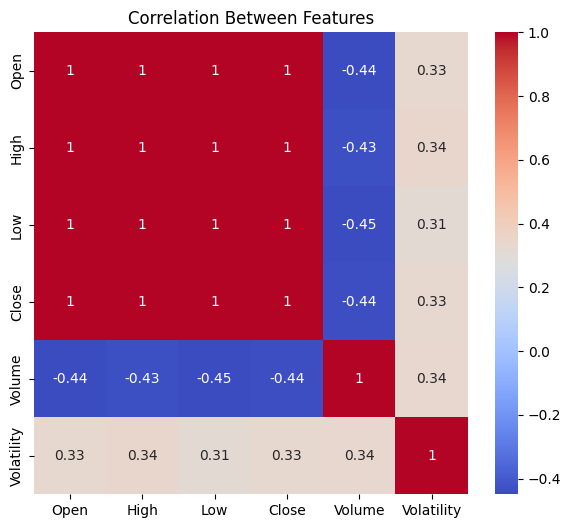

In [13]:
plt.figure(figsize=(7,6))
sns.heatmap(df[['Open','High','Low','Close','Volume','Volatility']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()
